In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[6.25000000e-01 9.37500000e-02 1.87500000e-01 7.23684211e-02
  2.13815789e-02]
 [1.91268191e-01 2.80665281e-01 3.51351351e-01 1.22661123e-01
  5.40540541e-02]
 [8.34621329e-02 3.94126739e-02 5.98918083e-01 2.27975270e-01
  5.02318393e-02]
 [1.13095238e-02 1.13095238e-02 1.38690476e-01 6.38690476e-01
  2.00000000e-01]
 [1.84706317e-04 5.54118951e-04 2.40118212e-03 5.65201330e-02
  9.40339860e-01]]


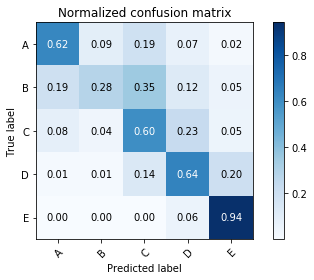

In [3]:
data = []
for year in range(2010, 2020):
    local_scaler = StandardScaler()
    raw_data = pd.read_csv("e_labeled_data/%s.csv" % year)
    raw_data = raw_data.loc[raw_data["consume_per_conn"] != np.inf].reset_index(drop = True)
    raw_data = raw_data.iloc[:, [1,2,3,4,5,6,8]]
    raw_data.iloc[:,[1,2,3]] = local_scaler.fit_transform(raw_data.iloc[:,[1,2,3]])
    data.append(raw_data)
data = pd.concat(data, ignore_index = True)
train_X, test_X, train_y, test_y = train_test_split(data.iloc[:,[0,1,2,3,4,5]], data.iloc[:,6], test_size = 0.4)

global_scaler = StandardScaler()
train_X.iloc[:,[0,4,5]] = global_scaler.fit_transform(train_X.iloc[:,[0,4,5]])
test_X.iloc[:,[0,4,5]] = global_scaler.transform(test_X.iloc[:,[0,4,5]])

# model
model = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = 8)
model.fit(train_X, train_y)
plot_confusion_matrix(test_y, model.predict(test_X), classes = np.array(["0", "A", "B", "C", "D", "E"]), normalize = True)